# Introducción a la regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

Los datos que utilizaremos son de viviendas de varios suburbios de Boston (Massachusetts), recopilados en 1978. Contiene 506 registros con datos sobre 14 caracteristicas de las viviendas. Puedes encontrarlos en Kaggle en el siguiente [enlace](https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset) 

Vamos a analizar las características que influyen sobre el precio de las viviendas y a partir de ellas, crear un modelo de predicción. 

In [45]:
# Libreria para manipular los datos
import pandas as pd
df = pd.read_csv('./housing.csv', header=None, sep='\s+')

In [46]:
# tamaño del dataset
df.shape

(506, 14)

In [47]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Las variables vienen sin los nombres por lo que debemos agregarlos

In [48]:
# Nombre de las columnas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [49]:
# Asignamos el nombre de las columnas al df
df.columns = column_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Signicado de Nombres**:
- CRIM: Indice de delincuencia per capita por ciudad
- ZN: Poporcion de suelo residencial con lotes de mas de 25.000 pies cuadrados (sq.ft)
- INDUS: Proporcion de zonas industriales medidos en acres por ciudad
- CHAS: Charles River es una variable ficticia (1 si el tramo linda con el rio; 0 en caso contrario)
- NOX: Concentración de óxidos nítricos (partes por 10 millones)
- RM: Promedio de habitaciones por vivienda.
- AGE: Proporción de viviendas ocupadas por sus propietarios construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Indice de accesibilidad a las autopistas radiales
- TAX: Tipo de impuesto sobre bienes inmuebles de valor íntegro por $10.000
- PTRATIO: Tasa de alumnos-profesor por ciudad.
- B: 1000(Bk - 0.63)^2 donde Bk es la proporcion de afrodescendientes por ciudad
- LSTAT: Porcentaje de poblacion con bajo estatus
- MEDV: Precio promedio de las viviendas ocupadas por sus propietarios en miles de dólares

Verifiquemos los tipos de datos de las variables

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Todos son de tipo numerico, un caso bastante ideal para aplicar el modelo de Regresión lineal. Lo siguiente es averiguar si la data contiene valores faltantes

In [51]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Por suerte los datos estan limpios, libres de valores faltantes y asi podemos pasar a la siguiente etapa 😅

## Entendiendo los datos
El siguiente paso es entender los datos y cómo estan relacionados. Para ello, calculamos la correlacion de todas las variables con la variable objetivo que en este caso es MEDV, el precio promedio de las viviendas y luego graficamos tales valores.

In [52]:
import seaborn as sns   # visualizacion de datos
import matplotlib.pyplot as plt # visualizacion de datos

In [53]:
# Estilo a los graficos
sns.set(style='whitegrid', context='notebook')

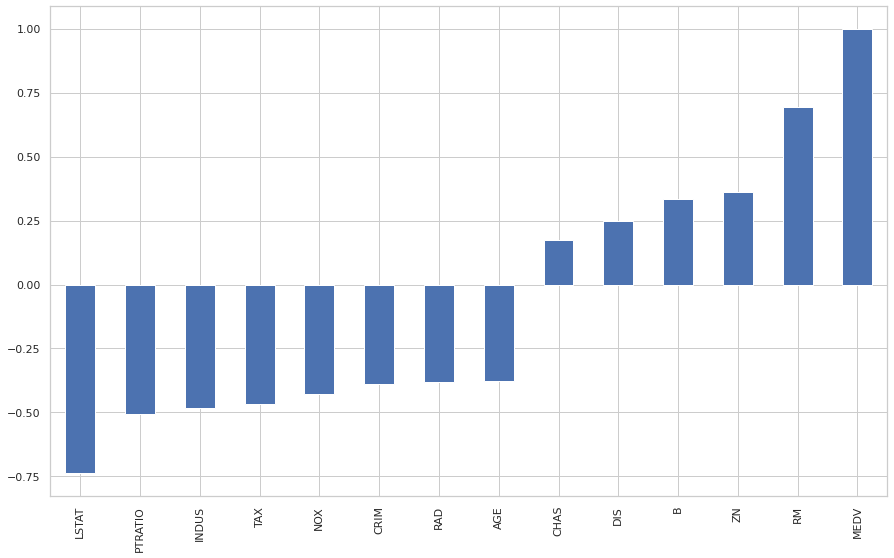

In [54]:
# Tamano del grafico
fig = plt.figure(figsize=(15,9))

# correlacion de todas las variables respecto a MEDV
df.corr()['MEDV'].sort_values(ascending=True).plot(kind='bar');

La grafica muestra la correlacion de todas las variables con MEDV. Se deduce lo siguiente:

- La variable RM (Promedio de habitaciones por vivienda) es la que mayor correlacion tiene con MEDV.
- La variable ZN (tamaño de la casa) tambien posee alta correlacion positiva con MEDV.
- La variable INDUS (Proporcion de zonas industriales) esta correlacionada negativamente con MEDV
- La variable PTATRIO (Tasa de alumnos-profesor por ciudad) es la segunda con mayor correlacion negativa con MEDV
- La variable LSTAT (Porcentaje de poblacion con bajo estatus) es la que mayor presenta correlacion negativa con MEDV

Ahora, elegimos las variables con mayor correlacion con MEDV, incluyendo MEDV y las guardamos en una lista

In [55]:

# Seleccion de las variables de interes
cols = ['ZN','LSTAT','PTRATIO','RM','MEDV']

Creamos una grafica pairplot de seaborn para ver el comportamiento de MEDV respecto a las demas variables.

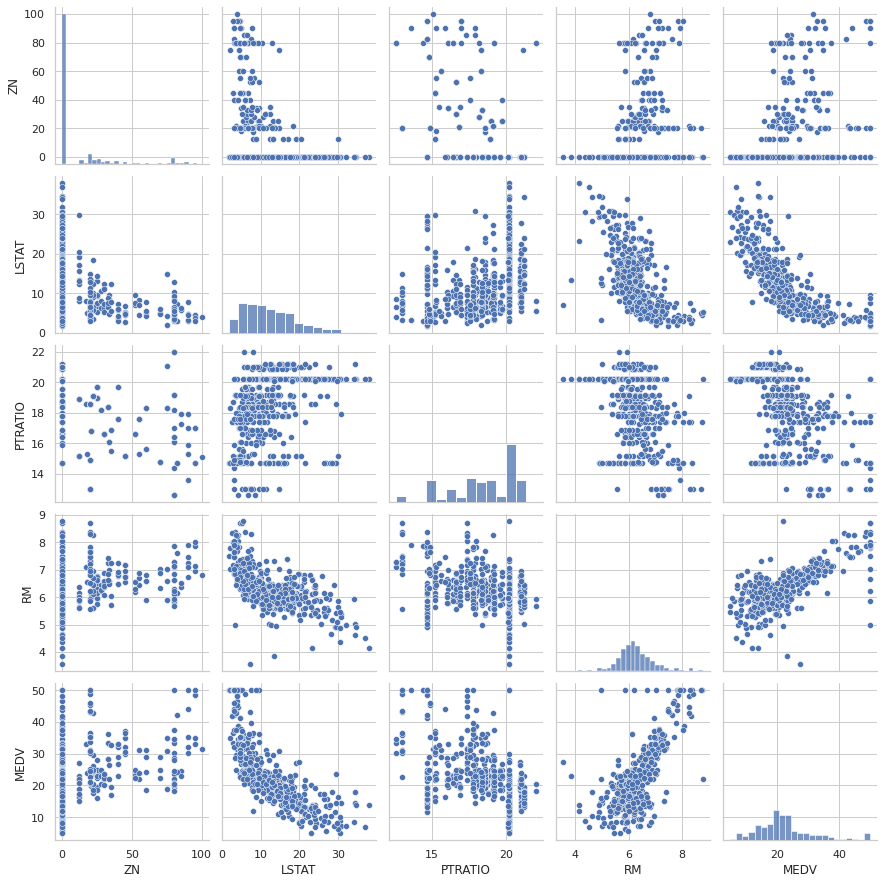

In [56]:
# Matriz de graficas que muestras todas las relaciones entre las variables
# height indica en tamano de los valores
sns.pairplot(df[cols], height=2.5);

La grafica muestra lo siguiente: 
- Las variables RM y MEDV presentan un comportamiento lineal.
- Las variables LSTAT y MEDV muestra un comportamiento polinomial.

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

In [57]:
# importamos numpy
import numpy as np

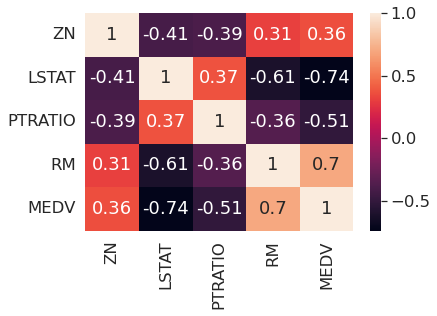

In [58]:
# calculo de correlaciones entre las variables
cm = np.corrcoef(df[cols].values.T)

# modificar tamano de valores en el grafico
sns.set(font_scale=1.5)

# heatmap para mostrar la informacion
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

Aca podemos constatar lo que muestra la grafica: 
- Alta correlacion positiva entre RM y MEDV (0.7)
- Alta correlacion negativa entre LSTAT y MEDV (-0.74)

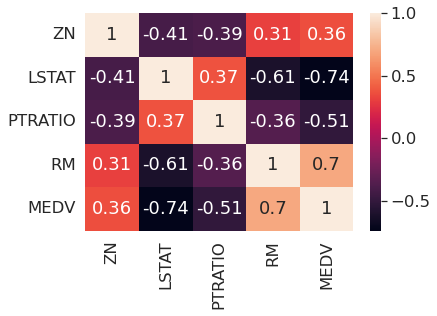

In [59]:
# otra forma alternativa de crear el heatmap con Pandas
# modificar tamano de valores
sns.set(font_scale=1.5)

#
sns.heatmap(df[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

Nuestro interes es aplicar un modelo de regresion lineal para predecir el precio de las viviendas, por tanto elegimos la variable que presenta tal comportamiento, en este caso es RM el promedio de habitaciones por vivienda, que tiende a una linea respecto a MEDV.

Elegimos a RM como la variable predictora y a MEDV como la variable objetivo

## Creando modelo con scikit-learn

Una vez definido el modelo que vamos aplicar y seleccionadas las variables, procedemos a crear el modelo entrenandolo con los datos existentes.

In [60]:
# Importamos libreria
from sklearn.preprocessing import  StandardScaler # ayuda a escalar los datos para que el modelo se ajuste mejor a ellos
from sklearn.linear_model import LinearRegression # funcion que se utiliza para la regresion

Definimos la variable objetivo y predictora

In [71]:
# Variable predictora
X = df['RM'].values.reshape(-1,1)

# Variable objetivo
y = df['MEDV'].values.reshape(-1,1)

# mostramos primer valor de X
print(X[0])

[6.575]


**Breve explicacion del metodo reshape**

Tenemos el siguiente array: arr = [2,3,4,5,6,7,8]
Su forma es (7,) lo que indica que es de una dimension. Al aplicar reshape: arr.reshape(-1,1) obtenemos

[[2],

 [3],

 [4],

 [5],

 [6],

 [7],

 [8]]

Su forma ahoras es (7,1) por lo que agregar una dimension

Estandarizamos los valores para ajustar mejor el modelo

In [67]:
# objetos estandarizados para ambas variables
sc_x = StandardScaler()
sc_y = StandardScaler()

# pasamos a los objetos los valores de la variable objetivo y predictora respectivamente
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

# mostramos priemr valor estandarizado
print(X_std[0])

[0.41367189]


Creamos el modelo de Regresion Lineal

In [63]:
# Creamos un objeto del modelo
slr = LinearRegression()

# pasamos las variables estandarizadas al modelo
slr.fit(X_std, y_std)

LinearRegression()

Ya creado el modelo, pasamos a analizar sus resultados visualmente.

## Análisis de resultados

Para evaluar que tan bien ajustado esta el modelo a los datos, utilizamos una visualizacion. Graficamos los valores estandarizados y la grafica de la regresion solo para ver que tan bien se ajusta el modelo a los datos

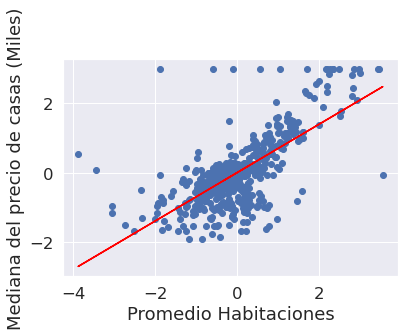

In [64]:
# grafica de los valores entandarizados
plt.scatter(X_std, y_std)

# Grafica de regresion
plt.plot(X_std, slr.predict(X_std), color='Red')
plt.ylabel('Mediana del precio de casas (Miles)')
plt.xlabel('Promedio Habitaciones');

Podemos observar que la grafica de la regresion (linea roja) intenta ajustarse lo mejor posible a los datos estadarizados.

## Generando predicción con el modelo
**Cual es el precio promedio de una casa que tiene 5 habitaciones?**

In [68]:
def Pred_Precio(num_hab):

    # estadanrizamos numero de habitaciones
    num_hab_std =- sc_x.transform(np.array([num_hab]).reshape(-1,1))

    # generamos la prediccion
    pred = slr.predict(num_hab_std)

    # invertimos el valor de la prediccion en su valor real
    precio = sc_y.inverse_transform(pred)

    # mostramos resultado
    print(f'El precio de una casa con {num_hab} habitaciones en Boston es de {pred}')

In [69]:
Pred_Precio(5)

El precio de una casa con 5 habitaciones en Boston es de [[1.2726238]]
